In [31]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [38]:
data= pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [39]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [62]:
new_data=data[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]

In [64]:
new_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
888,3,female,NaN,1,2,23.4500,0
889,1,male,26.0,0,0,30.0000,1


In [42]:
new_data.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [43]:
import seaborn as sns

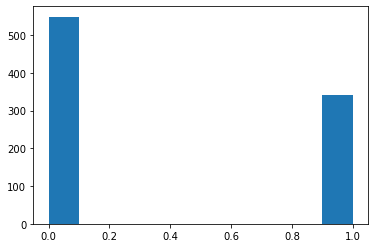

In [44]:
data['Survived'].hist(grid=False)

In [45]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [67]:
new_data['Age'].fillna(data['Age'].mean(), inplace=True)

In [68]:
new_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

In [69]:
new_data['Fare'].mean()

32.2042079685746

In [71]:
new_data['Sex']= new_data['Sex'].replace('male',0)

In [72]:
new_data['Sex']=new_data['Sex'].replace('female',1)

In [73]:
new_data.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

In [75]:
new_data['Age']=new_data['Age'].astype('int64')

In [79]:
from sklearn import tree

In [80]:
clf= tree.DecisionTreeClassifier()

In [81]:
from sklearn.model_selection import train_test_split

In [84]:
y= new_data['Survived']
X= new_data.drop('Survived', axis=1)

In [86]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=456)

In [89]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [90]:
pred_train= clf.predict(X_train)

In [91]:
pred_test= clf.predict(X_test)

In [93]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(pred_test, y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.78      0.73      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

